In [9]:
!pip install ucimlrepo

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.datasets import load_digits  # альтернативный способ загрузки digits
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [11]:
digits = load_digits()

X = pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
y = pd.DataFrame(digits.target, columns=['class'])

print("Информация о датасете:")
print(f"Размерность признаков (X): {X.shape}")
print(f"Размерность целевой переменной (y): {y.shape}")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Названия классов: {np.unique(y)}")
print(f"Диапазон значений пикселей: {X.min().min()} - {X.max().max()}")

Информация о датасете:
Размерность признаков (X): (1797, 64)
Размерность целевой переменной (y): (1797, 1)
Количество классов: 10
Названия классов: [0 1 2 3 4 5 6 7 8 9]
Диапазон значений пикселей: 0.0 - 16.0


In [12]:
print("Первые 5 строк признаков:")
print(X.head())

print("\nПервые 5 строк целевой переменной:")
print(y.head())

print(f"\nПропущенные значения в X: {X.isnull().sum().sum()}")
print(f"Пропущенные значения в y: {y.isnull().sum().sum()}")

print(f"\nРаспределение классов:")
print(y['class'].value_counts().sort_index())

Первые 5 строк признаков:
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_54  pixel_55  pixel_56  pixel_57  pixel_58  \
0      0.0      0.0  ...       0.0       0.0       0.0       0.0       6.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0       0.0   
2      0.0      0.0  ...       5.0       0.0       0.0       0.0       0.0   
3      0.0      8.0  ...       9.0       0.0       0.0       0.0       7.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       0.0   

   pixel_59  pixel_60  pixel_61  pixel_62 

Примеры handwritten digits:


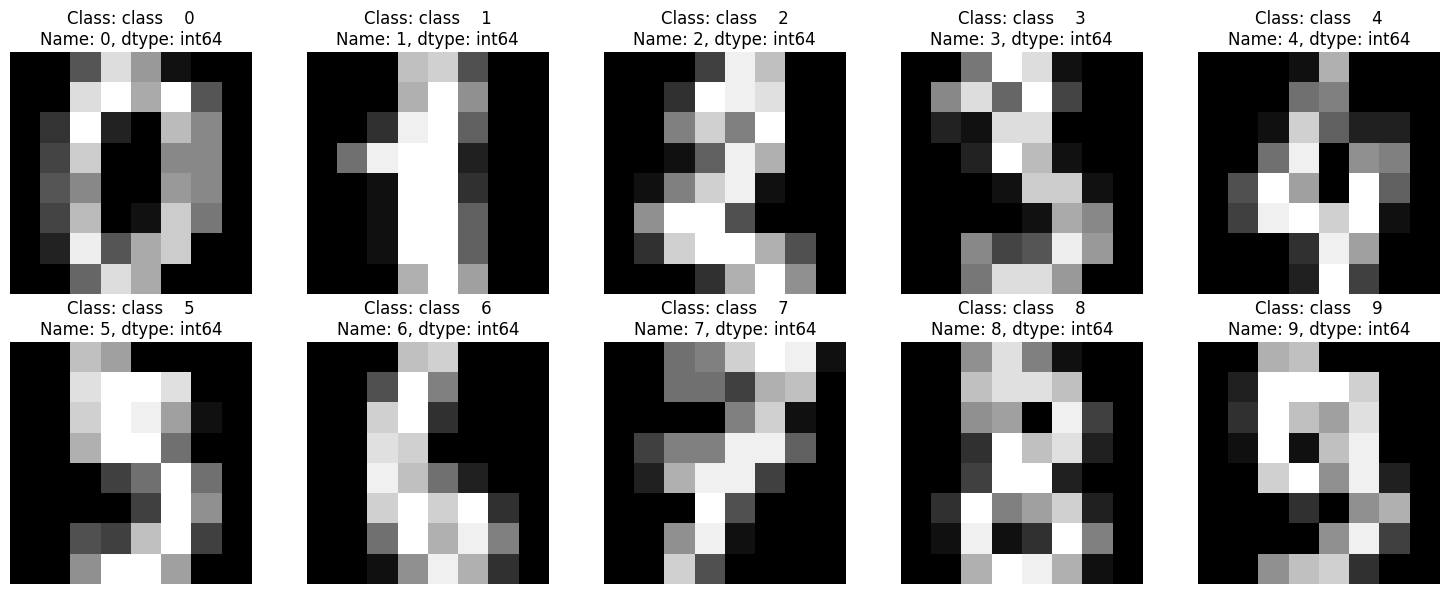

In [13]:
def plot_digits(X, y, num_samples=10):
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)

        digit_pixels = X.iloc[i].values.reshape(8, 8)
        plt.imshow(digit_pixels, cmap='gray')
        plt.title(f'Class: {y.iloc[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Примеры handwritten digits:")
plot_digits(X, y)

In [14]:
y_encoded = y['class'].values

print("Распределение классов:")
print(pd.Series(y_encoded).value_counts().sort_index())

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nРазмер train выборки: {X_train_scaled.shape}")
print(f"Размер test выборки: {X_test_scaled.shape}")
print(f"Количество классов: {len(np.unique(y_encoded))}")

Распределение классов:
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64

Размер train выборки: (1437, 64)
Размер test выборки: (360, 64)
Количество классов: 10


In [15]:
def create_base_model(input_dim, num_classes):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

input_dim = X_train_scaled.shape[1]
num_classes = len(np.unique(y_encoded))

base_model = create_base_model(input_dim, num_classes)
base_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Архитектура базовой модели:")
base_model.summary()

Архитектура базовой модели:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,986 (74.16 KB)

 Trainable params: 18,986 (74.16 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_base = base_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
    ]
)

test_loss_base, test_accuracy_base = base_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nБазовая модель - Test Accuracy: {test_accuracy_base:.4f}")

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.1250 - loss: 2.3839 - val_accuracy: 0.6181 - val_loss: 1.7856 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4477 - loss: 1.7380 - val_accuracy: 0.7604 - val_loss: 1.0920 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6046 - loss: 1.2363 - val_accuracy: 0.8715 - val_loss: 0.6375 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6994 - loss: 0.9251 - val_accuracy: 0.9028 - val_loss: 0.4205 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8227 - loss: 0.5776 - val_accuracy: 0.9167 - val_loss: 0.3074 - learning_rate: 0.0010
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.4929 - val_accuracy: 0.9201 - val_loss: 0.2421 - learning_rate: 0.0010
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8740 - loss: 0.4094 - val_

In [17]:
print("АВТОЭНКОДЕРНЫЙ ПОДХОД ДЛЯ ПРЕДОБУЧЕНИЯ")
print("="*50)

pretrained_weights = []

print("1. Обучение первого автоэнкодера:")
input_data = X_train_scaled
input_dim = X_train_scaled.shape[1]

encoder1 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,), name='encoder1')
])

decoder1 = models.Sequential([
    layers.Dense(input_dim, activation='sigmoid', name='decoder1')
])

autoencoder1 = models.Sequential([encoder1, decoder1])
autoencoder1.compile(optimizer='adam', loss='mse')

history1 = autoencoder1.fit(
    input_data, input_data,
    epochs=80,
    batch_size=32,
    validation_split=0.2,
    verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

print(f"  Первый автоэнкодер обучен. Final loss: {history1.history['loss'][-1]:.4f}")
pretrained_weights.append(encoder1.layers[0].get_weights())

print("2. Обучение второго автоэнкодера:")

encoded_data1 = encoder1.predict(input_data, verbose=0)

encoder2 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(128,), name='encoder2')
])

decoder2 = models.Sequential([
    layers.Dense(128, activation='relu', name='decoder2')
])

autoencoder2 = models.Sequential([encoder2, decoder2])
autoencoder2.compile(optimizer='adam', loss='mse')

history2 = autoencoder2.fit(
    encoded_data1, encoded_data1,
    epochs=80,
    batch_size=32,
    validation_split=0.2,
    verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

print(f"  Второй автоэнкодер обучен. Final loss: {history2.history['loss'][-1]:.4f}")
pretrained_weights.append(encoder2.layers[0].get_weights())

print("3. Обучение третьего автоэнкодера:")

encoded_data2 = encoder2.predict(encoded_data1, verbose=0)

encoder3 = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(64,), name='encoder3')
])

decoder3 = models.Sequential([
    layers.Dense(64, activation='relu', name='decoder3')
])

autoencoder3 = models.Sequential([encoder3, decoder3])
autoencoder3.compile(optimizer='adam', loss='mse')

history3 = autoencoder3.fit(
    encoded_data2, encoded_data2,
    epochs=80,
    batch_size=32,
    validation_split=0.2,
    verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

print(f"  Третий автоэнкодер обучен. Final loss: {history3.history['loss'][-1]:.4f}")
pretrained_weights.append(encoder3.layers[0].get_weights())

print("Все автоэнкодеры обучены!")

АВТОЭНКОДЕРНЫЙ ПОДХОД ДЛЯ ПРЕДОБУЧЕНИЯ
1. Обучение первого автоэнкодера:
  Первый автоэнкодер обучен. Final loss: 0.6099
2. Обучение второго автоэнкодера:
  Второй автоэнкодер обучен. Final loss: 0.0370
3. Обучение третьего автоэнкодера:
  Третий автоэнкодер обучен. Final loss: 1.6243
Все автоэнкодеры обучены!


In [18]:
print("СОЗДАНИЕ ОСНОВНОЙ СЕТИ С ПРЕДОБУЧЕННЫМИ ВЕСАМИ")
print("="*50)

pretrained_model = models.Sequential()


pretrained_model.add(layers.Dense(128, activation='relu',
                                input_shape=(input_dim,),
                                name='pretrained_layer1'))
pretrained_model.add(layers.Dropout(0.3))

pretrained_model.add(layers.Dense(64, activation='relu',
                                name='pretrained_layer2'))
pretrained_model.add(layers.Dropout(0.3))

pretrained_model.add(layers.Dense(32, activation='relu',
                                name='pretrained_layer3'))
pretrained_model.add(layers.Dropout(0.2))


pretrained_model.add(layers.Dense(num_classes, activation='softmax',
                                name='output_layer'))


print("Установка предобученных весов...")
pretrained_model.layers[0].set_weights(pretrained_weights[0])
pretrained_model.layers[2].set_weights(pretrained_weights[1])
pretrained_model.layers[4].set_weights(pretrained_weights[2])


pretrained_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Архитектура модели с предобучением:")
pretrained_model.summary()

СОЗДАНИЕ ОСНОВНОЙ СЕТИ С ПРЕДОБУЧЕННЫМИ ВЕСАМИ
Установка предобученных весов...
Архитектура модели с предобучением:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ pretrained_layer1 (Dense)       │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pretrained_layer2 (Dense)       │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pretrained_layer3 (Dense)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,986 (74.16 KB)

 Trainable params: 18,986 (74.16 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
print("ОБУЧЕНИЕ С УЧИТЕЛЕМ И ТОЧНАЯ НАСТРОЙКА")
print("="*50)

history_pretrained = pretrained_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
    ]
)

test_loss_pretrained, test_accuracy_pretrained = pretrained_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nМодель с предобучением - Test Accuracy: {test_accuracy_pretrained:.4f}")

ОБУЧЕНИЕ С УЧИТЕЛЕМ И ТОЧНАЯ НАСТРОЙКА
Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.1319 - loss: 9.5851 - val_accuracy: 0.3681 - val_loss: 1.9258 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2553 - loss: 3.5929 - val_accuracy: 0.7188 - val_loss: 0.9298 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3951 - loss: 1.9690 - val_accuracy: 0.7917 - val_loss: 0.7744 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5119 - loss: 1.5556 - val_accuracy: 0.8194 - val_loss: 0.6811 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5485 - loss: 1.3119 - val_accuracy: 0.8646 - val_loss: 0.5769 - learning_rate: 0.0010
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6000 - loss: 1.1906 - val_accuracy: 0.8889 - val_loss: 0.5139 - learning_rate: 0.0010
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - a

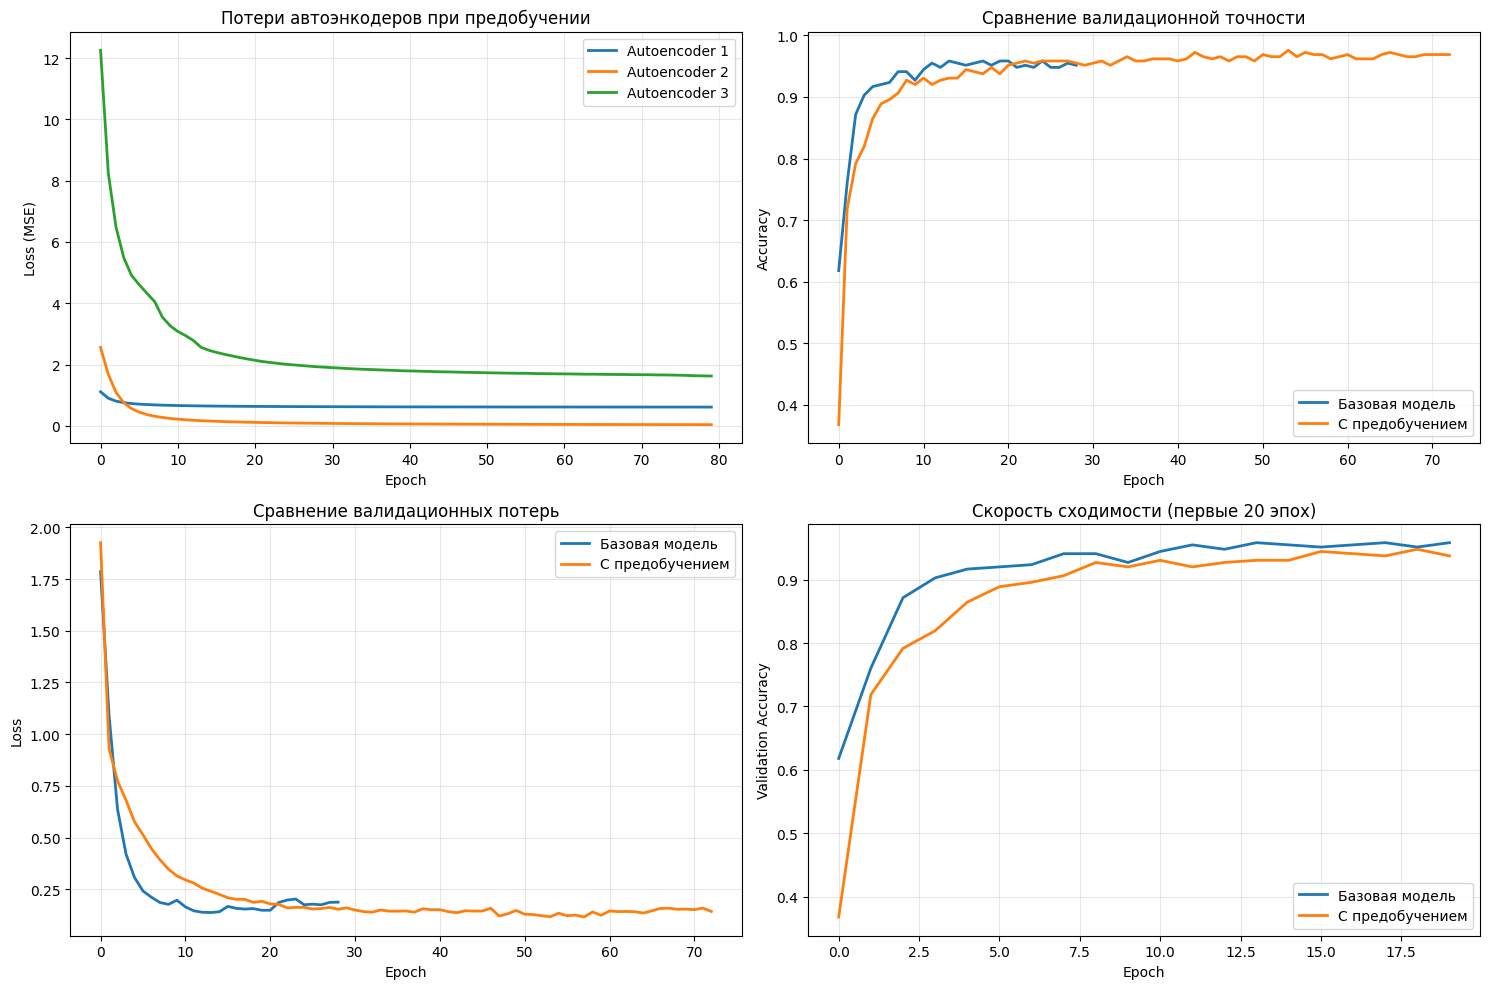

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Autoencoder 1', linewidth=2)
plt.plot(history2.history['loss'], label='Autoencoder 2', linewidth=2)
plt.plot(history3.history['loss'], label='Autoencoder 3', linewidth=2)
plt.title('Потери автоэнкодеров при предобучении')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(history_base.history['val_accuracy'], label='Базовая модель', linewidth=2)
plt.plot(history_pretrained.history['val_accuracy'], label='С предобучением', linewidth=2)
plt.title('Сравнение валидационной точности')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(history_base.history['val_loss'], label='Базовая модель', linewidth=2)
plt.plot(history_pretrained.history['val_loss'], label='С предобучением', linewidth=2)
plt.title('Сравнение валидационных потерь')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
min_epochs = min(len(history_base.history['val_accuracy']),
                 len(history_pretrained.history['val_accuracy']), 20)
plt.plot(range(min_epochs), history_base.history['val_accuracy'][:min_epochs],
         label='Базовая модель', linewidth=2)
plt.plot(range(min_epochs), history_pretrained.history['val_accuracy'][:min_epochs],
         label='С предобучением', linewidth=2)
plt.title('Скорость сходимости (первые 20 эпох)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Базовая модель:
Accuracy: 0.9694
F1-Score: 0.9695

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.90      0.97      0.93        36
           2       0.95      1.00      0.97        35
           3       1.00      0.97      0.99        37
           4       0.92      1.00      0.96        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.95      0.97      0.96        36
           8       1.00      0.89      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



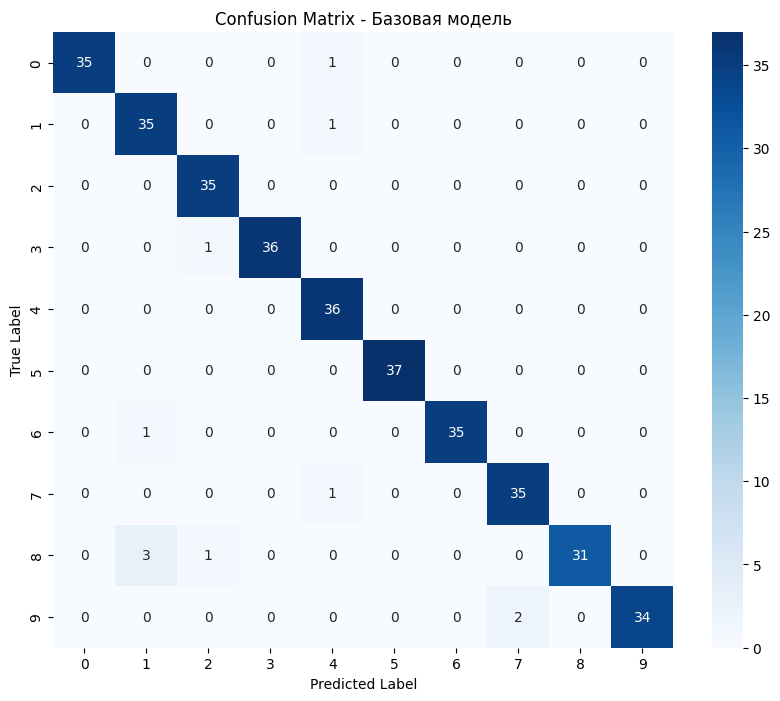


Модель с предобучением:
Accuracy: 0.9806
F1-Score: 0.9804

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       0.97      1.00      0.99        35
           3       0.97      1.00      0.99        37
           4       0.97      0.97      0.97        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       1.00      0.89      0.94        35
           9       1.00      0.97      0.99        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



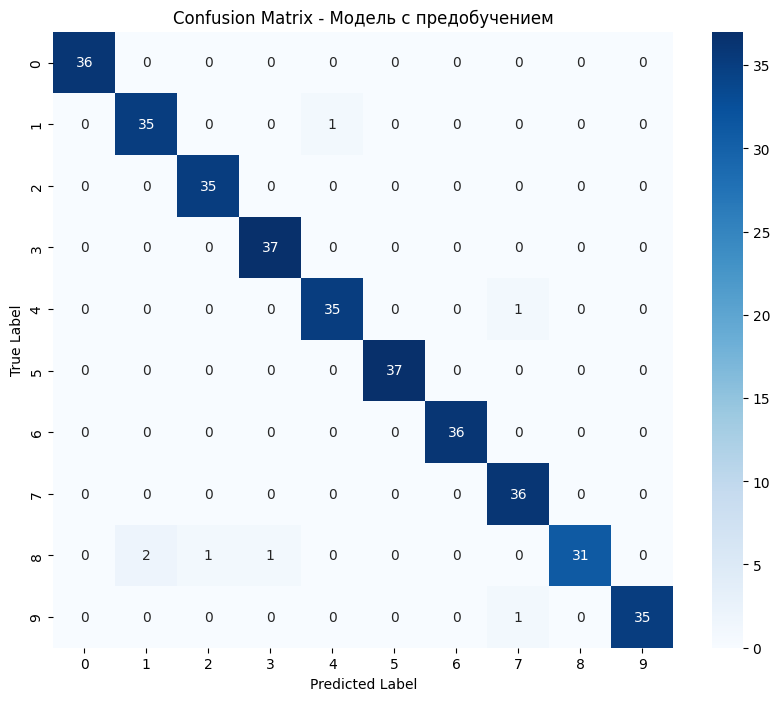

In [21]:
def evaluate_model(model, X_test, y_test, model_name):

    y_pred = model.predict(X_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = np.mean(y_pred_classes == y_test)
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes))

    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(10),
                yticklabels=range(10))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return accuracy, f1

print("="*50)
acc_base, f1_base = evaluate_model(base_model, X_test_scaled, y_test, "Базовая модель")
print("="*50)
acc_pretrained, f1_pretrained = evaluate_model(pretrained_model, X_test_scaled, y_test, "Модель с предобучением")